In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import metrics

In [2]:
df=pd.read_csv('car_data.csv')

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Modifying the Columns

In [4]:
#creating a new column No_year(Number of years car used)

current_datetime=datetime.now()
current_year=current_datetime.year
print(current_year)
df["No_Year"]=current_year-df["Year"]

2024


In [5]:
# Drop columns Car_Name and Year

df.drop(['Car_Name','Year'],axis=1,inplace=True)

In [6]:
# Transmission column :replacing manual with 0 and automatic with 1

print(df['Transmission'].unique())
df['Transmission'].replace({'Manual':0,'Automatic':1},inplace=True)

['Manual' 'Automatic']


In [7]:
# Fuel_Type column :replacing 'Petrol':0 ,'Diesel':1,'CNG':2 

print(df['Fuel_Type'].unique())
df['Fuel_Type'].replace({'Petrol':0,'Diesel':1,'CNG':2},inplace=True)

['Petrol' 'Diesel' 'CNG']


In [8]:
# Selling_type column :replacing 'Dealer':0 ,'Individual':1 

print(df['Selling_type'].unique())
df['Selling_type'].replace({'Dealer':0,'Individual':1},inplace=True)

['Dealer' 'Individual']


In [9]:
df

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,No_Year
0,3.35,5.59,27000,0,0,0,0,10
1,4.75,9.54,43000,1,0,0,0,11
2,7.25,9.85,6900,0,0,0,0,7
3,2.85,4.15,5200,0,0,0,0,13
4,4.60,6.87,42450,1,0,0,0,10
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,1,0,0,0,8
297,4.00,5.90,60000,0,0,0,0,9
298,3.35,11.00,87934,0,0,0,0,15
299,11.50,12.50,9000,1,0,0,0,7


In [10]:
df.isnull().sum()

Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
No_Year          0
dtype: int64

In [11]:
df.describe()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,No_Year
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189,10.372093
std,5.082812,8.642584,38886.883882,0.425801,0.478439,0.340021,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000,12.000000
max,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000,21.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Present_Price  301 non-null    float64
 2   Driven_kms     301 non-null    int64  
 3   Fuel_Type      301 non-null    int64  
 4   Selling_type   301 non-null    int64  
 5   Transmission   301 non-null    int64  
 6   Owner          301 non-null    int64  
 7   No_Year        301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


# data distribution

C:\Users\KOUSTAV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KOUSTAV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KOUSTAV\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

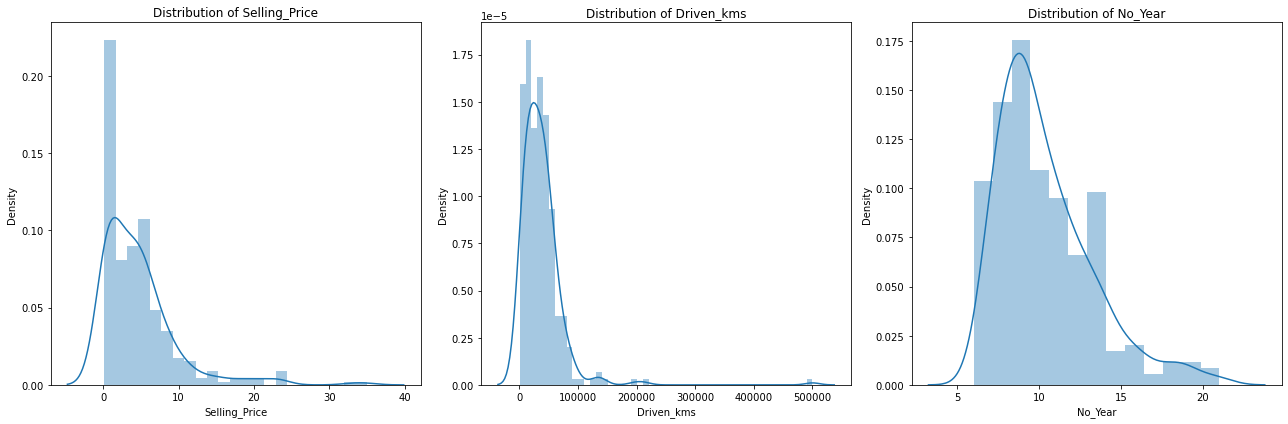

In [13]:
# Assuming df contains the DataFrame with columns 'Duration', 'Year', 'Rating', and 'Votes'
plt.figure(figsize=(18, 6))

# Plotting the first distplot for 'Duration'
plt.subplot(1, 3, 1)
sns.distplot(df['Selling_Price'])
plt.title('Distribution of Selling_Price')


# Plotting the third distplot for 'Rating'
plt.subplot(1,3,2)
sns.distplot(df['Driven_kms'])
plt.title('Distribution of Driven_kms')

# Plotting the fourth distplot for 'Votes'
plt.subplot(1, 3, 3)
sns.distplot(df['No_Year'])
plt.title('Distribution of No_Year')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


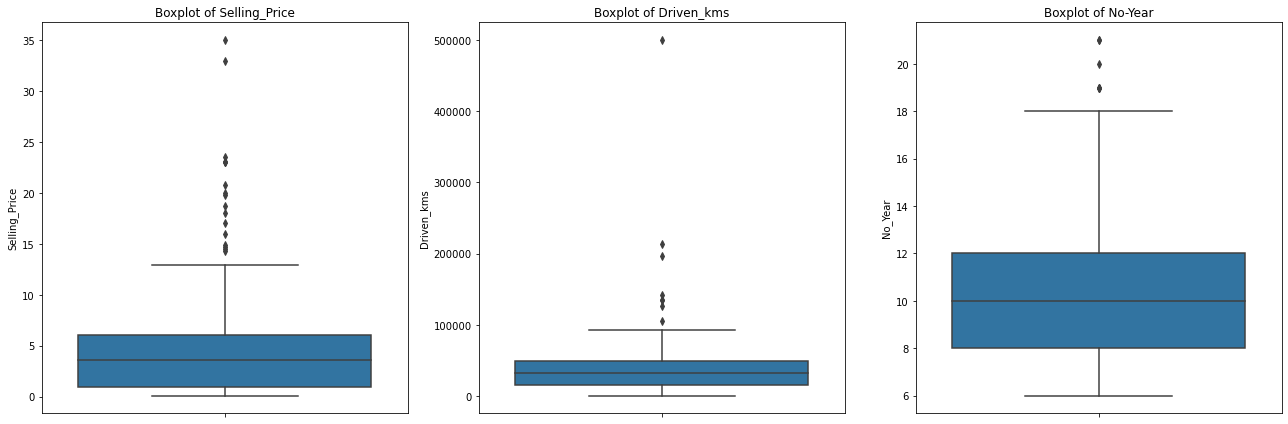

In [14]:
plt.figure(figsize=(18, 6))

# Plotting the first boxplot for 'Duration'
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='Selling_Price')
plt.title('Boxplot of Selling_Price')

# Plotting the second boxplot for 'Rating'
plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='Driven_kms')
plt.title('Boxplot of Driven_kms')

# Plotting the third boxplot for 'Votes'
plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='No_Year')
plt.title('Boxplot of No-Year')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# outlier detection

In [15]:
#Selling_Price

percentile25=df['Selling_Price'].quantile(0.25)
percentile75= df['Selling_Price'].quantile(0.75)
iqr=percentile75-percentile25
ul=percentile75+1.5*iqr
ll=percentile25-1.5*iqr
print(ul,ll)

13.649999999999999 -6.749999999999999


In [16]:
#Driven_kms

percentile25=df['Driven_kms'].quantile(0.25)
percentile75= df['Driven_kms'].quantile(0.75)
iqr=percentile75-percentile25
ul=percentile75+1.5*iqr
ll=percentile25-1.5*iqr
print(ul,ll)

99417.5 -35650.5


# Correlation Matrix


In [17]:
correlation_matrix = df.corr()
correlation_matrix

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,No_Year
Selling_Price,1.000000,0.878914,0.029187,0.509467,-0.550724,0.367128,-0.088344,-0.236141
Present_Price,0.878914,1.000000,0.203618,0.440493,-0.512121,0.348776,0.008058,0.047192
Driven_kms,0.029187,0.203618,1.000000,0.166801,-0.101419,0.162510,0.089216,0.524342
Fuel_Type,0.509467,0.440493,0.166801,1.000000,-0.352415,0.080466,-0.055705,-0.053643
Selling_type,-0.550724,-0.512121,-0.101419,-0.352415,1.000000,-0.063240,0.124269,0.039896
Transmission,0.367128,0.348776,0.162510,0.080466,-0.063240,1.000000,0.050316,0.000394
Owner,-0.088344,0.008058,0.089216,-0.055705,0.124269,0.050316,1.000000,0.182104
No_Year,-0.236141,0.047192,0.524342,-0.053643,0.039896,0.000394,0.182104,1.000000


# Splitting the data set into dependent and independent variable

In [18]:
# X is the independent variable ,Y is the dependent variable  variable

x=df.iloc[:,1:]
y= df.iloc[:, 0]



# Best Features

In [22]:


# Assuming x is your feature matrix (DataFrame) and y is your target variable (Series)
# Replace x and y with your actual feature matrix and target variable
# For demonstration purposes, let's assume you have already defined them

# Initialize SelectKBest with f_regression as the scoring function and select top 3 features
bestfeatures = SelectKBest(score_func=f_regression, k=3)

# Fit SelectKBest to your data
fit = bestfeatures.fit(x, y)

# Create DataFrame to store feature scores
dfscores = pd.DataFrame(fit.scores_)

# Create DataFrame to store feature names
dfcolumns = pd.DataFrame(x.columns)

# Concatenate feature names and scores into a single DataFrame for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

# Rename the columns
featureScores.columns = ['Specs', 'Score']

# Print the top 10 features with the highest scores
print(featureScores.nlargest(10, 'Score'))


           Specs        Score
0  Present_Price  1015.231064
3   Selling_type   130.164012
2      Fuel_Type   104.812250
4   Transmission    46.577926
6        No_Year    17.657642
5          Owner     2.351956
1     Driven_kms     0.254931


# LINEAR REGRESSION

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#  x is  features(independent variable)  and y is target variable(dependent variable)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Predict on the testing data
prediction= model.predict(x_test)



# Model Evaluation

In [ ]:
MAE:Lower MAE values indicate better model performance. 
MSE:lower MSE values indicate better model performance.
RMSE: Lower RMSE values indicate better model performance(lies B/W 0 to 1)
R_SQUARED:Higher R2 values indicate better model performance

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R_SQUARED', metrics.r2_score(y_test, prediction))

MAE: 1.221932362175384
MSE: 3.5315798889686305
RMSE: 1.8792498207978179
R_SQUARED 0.846690241966383
